# 2.3 Histogram Processing and Function Plotting
## 2.3.1 Generating and Plotting Image Histograms
#### The core function in the toolbox for dealing with image histogram is `imhist`, with the basic syntax:

In [ ]:
h = imhist(f, b)

#### where $f$ is the input image, $h$ is its histogram, and $b$ is the number of bins used in forming the histogram, if $b$ is not included in the argument, $b=256$ is used by default.

#### We obtain the normalized histogram by using the expression

In [ ]:
p = imhist(f, b) / numel(f)

#### Function `numel(f)` gives the number of elements in array $f$ (i.e., the number of pixels in the image).

### Example 2.4: Computing and plotting image histograms.

#### The simplest way to plot its histogram on the screen is to use `imhist` with no output specified:

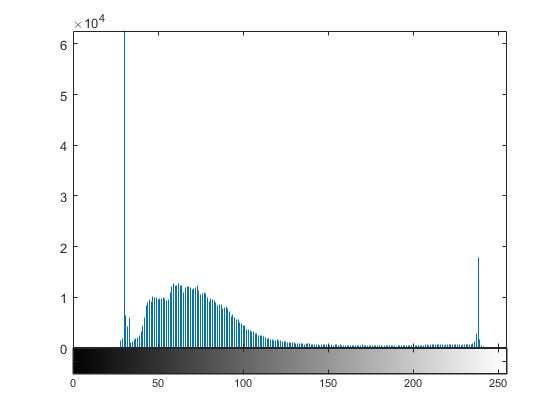

In [2]:
f = imread('Fig0203(a).tif');
imhist(f)

#### Histograms can be plotted also using *bar* graphs. For this purpose we can use the function

In [ ]:
bar(horz, z, width)

#### where $z$ is a row vector containing the points to be plotted,`horz` is a vector of the same dimension as $z$ that contains the increments of the horizontal scale, and `width` is a number between 0 and 1.

#### In other words, the values of `horz` give the horizontal increments and the values of $z$ are the corresponding vertical values. If `horz` is omitted, the horizontal axis is divided in units from 0 to `length(z)`. When `width` is 1, the bars touch; when it is 0, the bars are vertical reduce the resolution of the horizontal axis by dividing it into bands.

#### The following commands produce a bar graph, with the horizontal axis divided into group of approximately 10 levels:

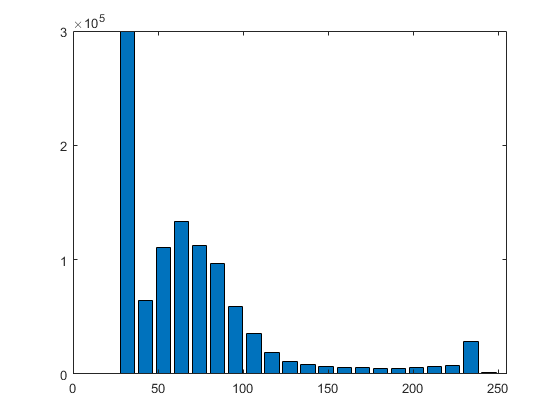

In [15]:
f = imread('Fig0203(a).tif');
h = imhist(f, 25);
horz = linspace(0, 255, 25);
bar(horz, h)
axis([0 255 0 300000])
set(gca, 'xtick', 0:50:255)
set(gca, 'ytick', 0:100000:300000)

#### One of the `axis` function syntax forms is

In [ ]:
axis([horzmin horzmax vertmin vertmax])

#### which sets the mininum and maximum values in the horizontal and vertical axes.

#### `gca` means "get current axis" (i.e., the axes of the figure last displayed), and `xtick` and `ytick` set the horizontal and vertical axes ticks in the intervals shown.

#### Another syntax used frequently is

In [ ]:
axis tight

#### which sets the axis limits to the range of the data.

#### Axis labels can be added to the horizontal and vertical axes of a graph using the functions

In [ ]:
xlabel('text string', 'fontsize', size)
ylabel('text string', 'fontsize', size)

#### where $size$ is the font size in points.

#### Text can be added to the body of the figure by using function `text`, as follows:

In [ ]:
text(xloc, yloc, 'text string', 'fontsize', size)

#### where $xloc$ and $yloc$ define the location where starts.

#### It is important to note that functions that set axis values and labels are used **after** the function has been plotted.

#### A title can be added to a plot using function `title`, whose basic syntax is

In [ ]:
title('title string')

#### where `title string` is the string of characters that will appear on the centered above the plot.

#### A stem graph is similar to a bar graph. The syntax is

In [ ]:
stem(horz, z, 'LineSpec', 'fill')

#### where $z$ is row vector containing the points to be plotted, and $horz$ is as described for function $bar$. If $horz$ is omitted, the horizontal axis is divided in units from 0 to $length(z)$, as before.

#### The argument, `LineSpec` is a triplet of values from Table 2.1.

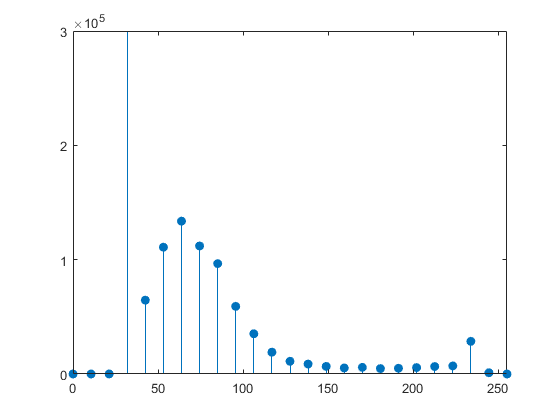

In [16]:
f = imread('Fig0203(a).tif');
h = imhist(f, 25);
horz = linspace(0, 255, 25);
stem(horz, h, 'fill')
axis([0 255 0 300000])
set(gca, 'xtick', 0:50:255)
set(gca, 'ytick', 0:100000:300000)

#### Next, we consider function `plot`, which plots a set of points by linking them with straight lines. The syntax is

In [ ]:
plot(horz, z, 'LineSpec')

#### where the arguments are as defined previously for stem plots.

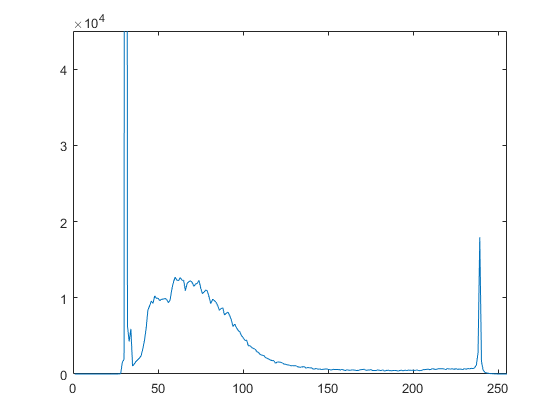

In [11]:
f = imread('Fig0203(a).tif');
hc = imhist(f);
plot(hc)
axis([0 255 0 45000])
set(gca, 'xtick', 0:50:255)
set(gca, 'ytick', 0:10000:45000)

#### Function `plot` is used frequently to display transformation functions.

#### To set the limits and ticks automatically, use functions `ylim` and `xlim`, which for our purpose here, have the syntax forms

In [ ]:
ylim('auto')
xlim('auto')

#### Among other possible variations of the syntax for these two functions, there is a manual option, given by

In [ ]:
ylim([ymin ymax])
xlim([xmin xmax])

#### If the limits are specified for only one axis, the limits on the other axis are set to `'auto'` by default.

#### Typing `hold on` at the prompt retains the current plot and certain axes properties so that subsequent graphing commands add to the existing graph.

## 2.3.2 Histogram Equalization

#### Histogram equalization is implemented in the toolbox by function `histeq`, which has the syntax

In [ ]:
g = histeq(f, nlev)

#### where $f$ is the input image and $nlev$ is the number of intensity levels specified for the output image.

### Example 2.5: Histogram equalization

警告: 图像太大，无法在屏幕上显示；将以 67% 显示
> In images.internal.initSize (line 71)
  In imshow (line 336)



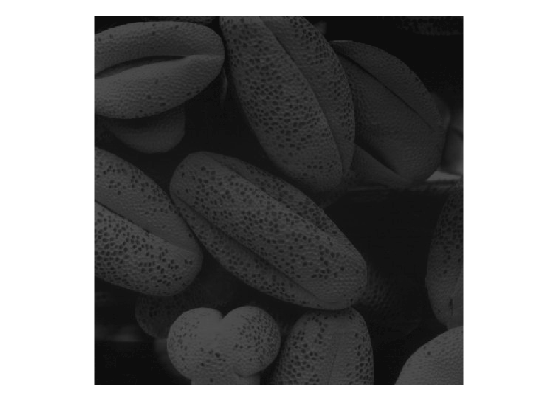

In [3]:
f = imread('Fig0208(a).tif');
imshow(f)

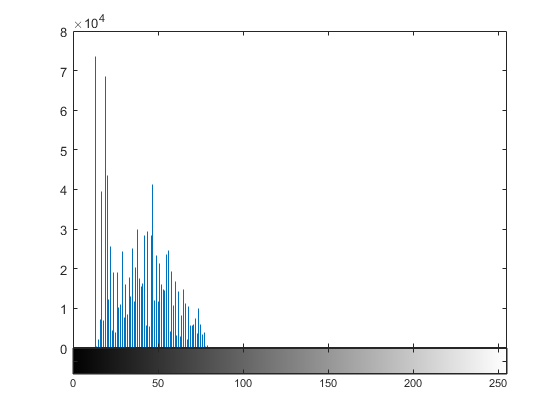

In [4]:
imhist(f)
ylim('auto')

警告: 图像太大，无法在屏幕上显示；将以 67% 显示
> In images.internal.initSize (line 71)
  In imshow (line 336)



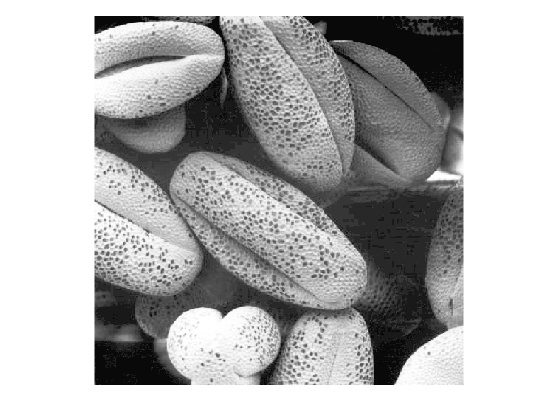

In [7]:
g = histeq(f, 256);
imshow(g)

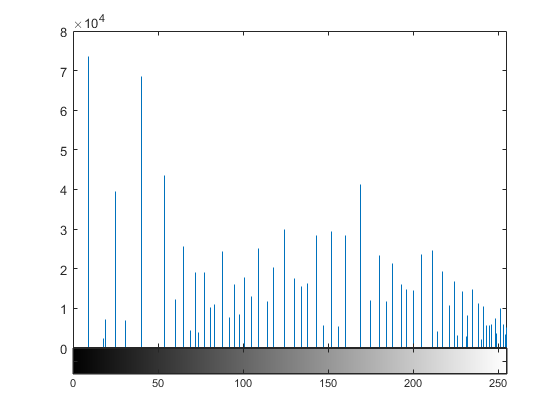

In [8]:
imhist(g)
ylim('auto')

#### As noted earlier, the transformation function used in histogram equalization is the cumulative sum of normalized histogram values. We can use function `cumsum` to obtain the transformation function, as follows:

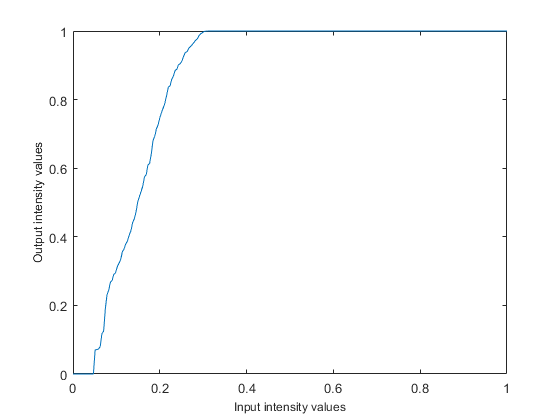

In [24]:
hnorm = imhist(f)./numel(f);
cdf = cumsum(hnorm);

x = linspace(0, 1, 256);
plot(x, cdf)
axis([0 1 0 1]);
set(gca, 'xtick', 0:.2:1)
set(gca, 'ytick', 0:.2:1)
xlabel('Input intensity values', 'fontsize', 9)
ylabel('Output intensity values', 'fontsize', 9)

## 2.3.3 Histogram Matching (Specification)

#### The toolbox implements histogram matching using the following syntax in `histeq`:

In [ ]:
g = histeq(f, hspec)

#### where $f$ is the input image, $hspec$ is the specified histogram (a row vector of specified values), and $g$ is the output image, whose histogram approximates the specified histogram, $hspec$. This vector should contain integer counts corresponding to equally spaced bins. A property of `histeq` is that the histogram of $g$ generally better matches $hspec$ when $length(hspec)$ is much smaller than the number of intensity levels in $f$.

警告: 图像太大，无法在屏幕上显示；将以 67% 显示
> In images.internal.initSize (line 71)
  In imshow (line 336)



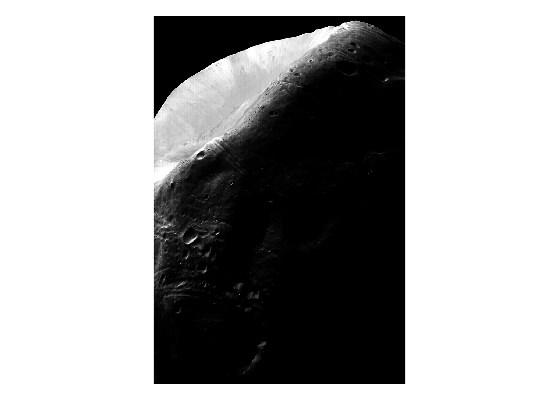

In [1]:
f = imread('Fig0210(a).tif');
imshow(f)

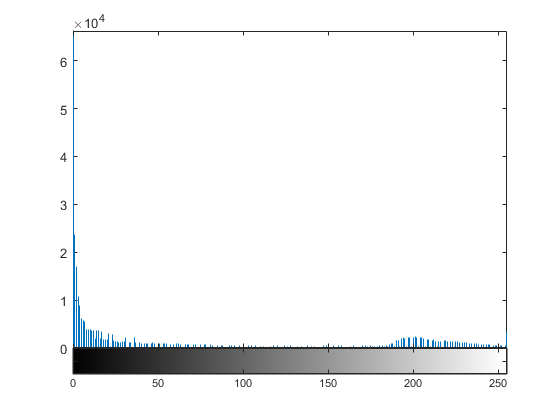

In [2]:
imhist(f)

警告: 图像太大，无法在屏幕上显示；将以 67% 显示
> In images.internal.initSize (line 71)
  In imshow (line 336)



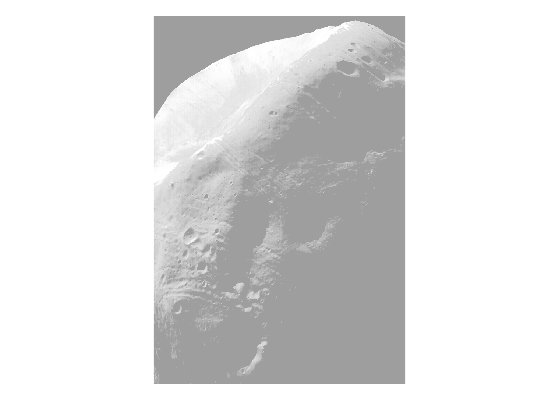

In [3]:
f1 = histeq(f, 256);
imshow(f1)

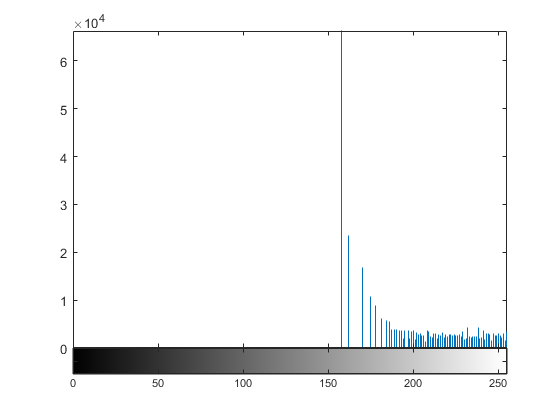

In [4]:
imhist(f1)

## 2.3.4 Function adapthisteq

#### The syntax for `adapthisteq` is 

g = adapthisteq(f, param1, val1, param2, val2, ...)

#### where $f$ is the input image, $g$ is the output image, and the `param/val` pairs are as listed in Table 2.2.

警告: 图像太大，无法在屏幕上显示；将以 67% 显示
> In images.internal.initSize (line 71)
  In imshow (line 336)



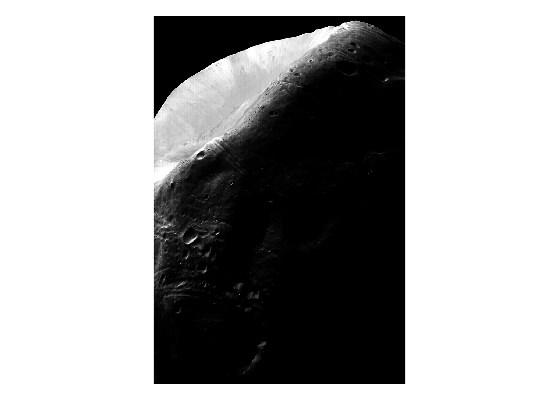

In [5]:
f = imread('Fig0210(a).tif');
imshow(f)

警告: 图像太大，无法在屏幕上显示；将以 67% 显示
> In images.internal.initSize (line 71)
  In imshow (line 336)



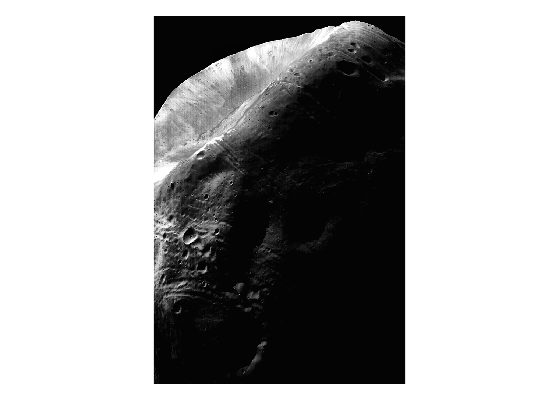

In [6]:
g1 = adapthisteq(f);
imshow(g1)

警告: 图像太大，无法在屏幕上显示；将以 67% 显示
> In images.internal.initSize (line 71)
  In imshow (line 336)



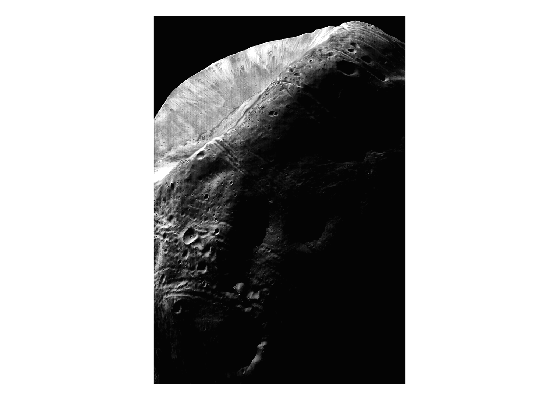

In [7]:
g2 = adapthisteq(f, 'NumTiles', [25 25]);
imshow(g2)

警告: 图像太大，无法在屏幕上显示；将以 67% 显示
> In images.internal.initSize (line 71)
  In imshow (line 336)



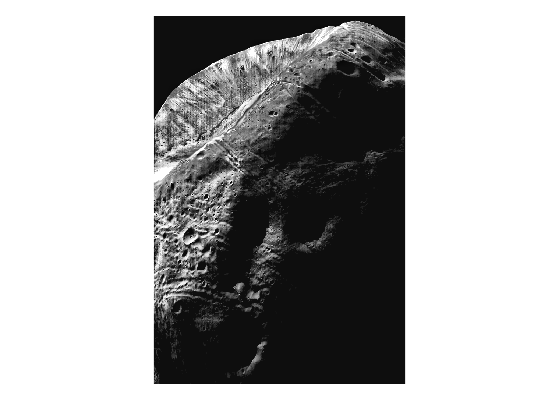

In [8]:
g3 = adapthisteq(f, 'NumTiles', [25 25], 'ClipLimit', 0.05);
imshow(g3)